# Capstone Project - The Battle of Neighborhoods

## 1. Introduction

Warsaw and Berlin are capital cities of countries which are especially dear to me. With a 4.2% GDP growth in 2019, Poland ranks as the second European's fastest-growing economy. Warsaw as one of the fastest-growing capital cities in the EU is also the place where I want to live after my Master studies.

These capital cities are located in two neighboring countries. Germany with its capital Berlin is one of the biggest economic powers in the world.

Similarities in these two capital cities will be checked to find patterns between venues which are located there. Comparison of these two capitals will help people who are looking for answers related to similarities in these places. It will be also valuable for people who are curious and want to know places which are located in Warsaw and Berlin.

## 2. Data

For this project data available on the Foursquare's API will be used. It will be used to check data in Berlin and Warsaw in terms of their neighborhoods. The data used includes information about different venues and their neighborhoods.

Moreover data about districts of these two cities, which was available on wikipedia.com, was used:

Warsaw: https://en.wikipedia.org/wiki/Districts_of_Warsaw

Berlin: https://en.wikipedia.org/wiki/Boroughs_and_neighborhoods_of_Berlin


## 3. Research 

In [2]:
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't installed folium
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't installed geopy


In [15]:
# Library to handle data in a vectorized manner
import numpy as np 

# Library for data analsysis
import pandas as pd 

# Library to handle JSON files
import json 

# Convert an address into latitude and longitude values
from geopy.geocoders import Nominatim 

# Library to handle requests
import requests 

# Tranform JSON file into a pandas dataframe
from pandas.io.json import json_normalize 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# Import k-means from clustering stage
from sklearn.cluster import KMeans

# Map rendering library
import folium 

# Import display for displaying map
from IPython.display import display

print('Libraries imported.')

Libraries imported.


In [36]:
#df = pd.read_csv('Capital_Cities.csv')

url = 'https://raw.githubusercontent.com/ArcadiusM/Coursera_Capstone/master/Capital_Cities.csv'
df = pd.read_csv(url,header=0,error_bad_lines=False, sep = ";")
df.head()

,City,District
0,Warsaw,Bemowo
1,Warsaw,Bialoleka
2,Warsaw,Bielany
3,Warsaw,Mokotow
4,Warsaw,Ochota


##### Importing the neighborhoods of Warsaw - names of districts

In [44]:
Warsaw = df.where(df["City"] == "Warsaw")

Warsaw['Latitude'] = "NaN"
Warsaw['Longitude'] = "NaN"

Warsaw.dropna(inplace = True)
Warsaw.head()

,City,District,Latitude,Longitude
0,Warsaw,Bemowo,NaN,NaN
1,Warsaw,Bialoleka,NaN,NaN
2,Warsaw,Bielany,NaN,NaN
3,Warsaw,Mokotow,NaN,NaN
4,Warsaw,Ochota,NaN,NaN


##### Importing the neighborhoods of Berlin - names of districts

In [52]:
Berlin = df.where(df["City"] == "Berlin")

Berlin['Latitude'] = "NaN"
Berlin['Longitude'] = "NaN"

Berlin.dropna(inplace = True)
Berlin = Berlin.reset_index(drop = True)
Berlin.head()

,City,District,Latitude,Longitude
0,Berlin,Charlottenburg-Wilmersdorf,NaN,NaN
1,Berlin,Friedrichshain-Kreuzberg,NaN,NaN
2,Berlin,Lichtenberg,NaN,NaN
3,Berlin,Marzahn-Hellersdorf,NaN,NaN
4,Berlin,Mitte,NaN,NaN


###### Latitute and Longitude of districts of Warsaw and Berlin

In [62]:
# Latitute and Longitude of districts of Warsaw
for i, row in Warsaw.iterrows():
    districts = row["District"] + ",Warsaw"
    geolocator = Nominatim(user_agent="mycapstoneproject")
    location = geolocator.geocode(districts)
               
    Warsaw.at[i, "Latitude"] = location.latitude 
    Warsaw.at[i, "Longitude"] = location.longitude
    
Warsaw.head()

,City,District,Latitude,Longitude
0,Warsaw,Bemowo,52.239,20.9133
1,Warsaw,Bialoleka,52.3197,21.0212
2,Warsaw,Bielany,52.2947,20.93
3,Warsaw,Mokotow,52.194,21.0458
4,Warsaw,Ochota,52.2122,20.9726


In [63]:
# Latitute and Longitude of districts of Berlin
for i, row in Berlin.iterrows():
    districts = row["District"] + ",Berlin"
    geolocator = Nominatim(user_agent="mycapstoneproject")
    location = geolocator.geocode(districts)
               
    Berlin.at[i, "Latitude"] = location.latitude 
    Berlin.at[i, "Longitude"] = location.longitude

Berlin.head()

,City,District,Latitude,Longitude
0,Berlin,Charlottenburg-Wilmersdorf,52.5079,13.264
1,Berlin,Friedrichshain-Kreuzberg,52.5153,13.4616
2,Berlin,Lichtenberg,52.5322,13.5119
3,Berlin,Marzahn-Hellersdorf,52.5225,13.5877
4,Berlin,Mitte,52.5177,13.4024


In [69]:
# Latitute and Longitude of Warsaw

geolocator = Nominatim(user_agent = "warsaw_adress")
location = geolocator.geocode("Warsaw")
warsaw_latitude, warsaw_longitude = location.latitude, location.longitude
print('The geograpical coordinates of Warsaw are {}, {}.'.format(warsaw_latitude, warsaw_longitude))

The geograpical coordinates of Warsaw are 52.2319237, 21.0067265.


In [70]:
# Latitute and Longitude of Berlin

geolocator = Nominatim(user_agent = "berlin_adress")
location = geolocator.geocode("Berlin")
berlin_latitude, berlin_longitude = location.latitude,location.longitude
print('The geograpical coordinates of Berlin are {}, {}.'.format(berlin_latitude, berlin_longitude))

The geograpical coordinates of Berlin are 52.5170365, 13.3888599.


In [75]:
Warsaw_map = folium.Map(location=[warsaw_latitude, warsaw_longitude], zoom_start=11, tiles='cartodbpositron')

for lat, lng, district in zip(Warsaw['Latitude'], Warsaw['Longitude'], 
                                  Warsaw['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Warsaw_map)  
    
display(Warsaw_map)

In [77]:
Berlin_map = folium.Map(location=[berlin_latitude, berlin_longitude], zoom_start=11, tiles='cartodbpositron')

for lat, lng, district in zip(Berlin['Latitude'], Berlin['Longitude'], 
                                  Berlin['District']):
    label = '{}'.format(district)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(Berlin_map)  
    
display(Berlin_map)

In [78]:
CLIENT_ID = 'A4PSPOSRKKDKKMM2MSOLIC11SBIYEI2LOEDD4TLGMCW4PQEI'
CLIENT_SECRET = 'D0TH5YFBXJYTZEGSJQE3FW50ZOV4CDRK510VGLXYOVP4DMKN'
VERSION = '20180605'

#print('Your credentails:')
#print('CLIENT_ID: ' + CLIENT_ID)
#print('CLIENT_SECRET:' + CLIENT_SECRET)

# Explore Neighborhoods

In [89]:
def getNearbyVenues(cities, names, latitudes, longitudes, radius=500, LIMIT = 500):
    
    venues_list=[]
    for cities, name, lat, lng in zip(cities, names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        venues_list.append([(
            cities,
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City',
                  'District', 
                  'District Latitude', 
                  'District Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [90]:
cities = pd.concat([Warsaw, Berlin])

venues = getNearbyVenues(cities=cities['City'],
                                names=cities['District'],
                                   latitudes=cities['Latitude'],
                                   longitudes=cities['Longitude']
                                  )

Bemowo
Bialoleka
Bielany
Mokotow
Ochota
Praga-Poludnie
Praga-Polnoc
Rembertow
Srodmiescie
Targowek
Ursus
Ursynow
Wawer
Wesola
Wilanow
Wlochy
Wola
Zoliborz
Charlottenburg-Wilmersdorf
Friedrichshain-Kreuzberg
Lichtenberg
Marzahn-Hellersdorf
Mitte
Neukoelln
Pankow
Reinickendorf
Spandau
Steglitz-Zehlendorf
Tempelhof-Schoeneberg
Treptow-Koepenick


In [293]:
venues.head(10)

,City,District,District Latitude,District Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Warsaw,Bemowo,52.238974,20.913288,Lidl,52.239942,20.913861,Food & Drink Shop
1,Warsaw,Bemowo,52.238974,20.913288,La Fiaccola,52.240811,20.912208,Italian Restaurant
2,Warsaw,Bemowo,52.238974,20.913288,CieKawa,52.242059,20.913374,Café
3,Warsaw,Bemowo,52.238974,20.913288,Biedronka,52.236720,20.911997,Supermarket
4,Warsaw,Bemowo,52.238974,20.913288,Subway,52.239826,20.906119,Sandwich Place
5,Warsaw,Bemowo,52.238974,20.913288,Media Markt,52.239926,20.907343,Electronics Store
6,Warsaw,Bemowo,52.238974,20.913288,Supersam w os. SHIRAZ,52.242085,20.910663,Food & Drink Shop
7,Warsaw,Bemowo,52.238974,20.913288,Sports Direct,52.239655,20.907589,Sporting Goods Shop
8,Warsaw,Bemowo,52.238974,20.913288,Kazubów,52.242665,20.912682,Bus Station
9,Warsaw,Bemowo,52.238974,20.913288,Stolica Pączków,52.242100,20.908897,Donut Shop


In [120]:
cities_by_venues = venues.groupby("City").count()
print ("Number of venues in Berlin is {} \
       \nNumber of venues in Warsaw is {}." .format(cities_by_venues["District"][0], cities_by_venues["District"][1]))

Number of venues in Berlin is 300        
Number of venues in Warsaw is 218.


In [197]:
districts_by_venues = venues.groupby("District").count()
districts_by_venues = districts_by_venues["City"]
districts_by_venues

District
Bemowo                         11
Bielany                         4
Charlottenburg-Wilmersdorf      9
Friedrichshain-Kreuzberg      100
Lichtenberg                     7
Marzahn-Hellersdorf             9
Mitte                          57
Mokotow                         4
Neukoelln                      86
Ochota                         17
Pankow                          4
Praga-Polnoc                    6
Praga-Poludnie                  5
Reinickendorf                   4
Rembertow                       4
Spandau                         8
Srodmiescie                   100
Steglitz-Zehlendorf             7
Targowek                        4
Tempelhof-Schoeneberg           6
Treptow-Koepenick               3
Ursus                           5
Ursynow                         6
Wawer                           4
Wesola                          4
Wilanow                         1
Wlochy                          5
Wola                           16
Zoliborz                       22
Name:

In [157]:
print('There are {} unique categories.' .format(len(venues['Venue Category'].unique())))

There are 171 unique categories.


In [253]:
onehot = pd.get_dummies(venues[['Venue Category']], prefix="", prefix_sep="")

onehot['District'] = venues['District'] 
#onehot['Number of venues'] = districts_by_venues["City"]
fixed_columns = [onehot.columns[-1]] + list(onehot.columns[:-1])
onehot = onehot[fixed_columns]

onehot.head()

,District,Accessories Store,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Baby Store,Bakery,...,Thrift / Vintage Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Winery,Yoga Studio
0,Bemowo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bemowo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bemowo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bemowo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bemowo,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [257]:
cities_grouped = onehot.groupby('District').mean().reset_index()
cities_grouped.head()

,District,Accessories Store,Arcade,Argentinian Restaurant,Art Gallery,Art Museum,Asian Restaurant,Athletics & Sports,Baby Store,Bakery,...,Thrift / Vintage Store,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wine Bar,Winery,Yoga Studio
0,Bemowo,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.00,0.00
1,Bielany,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.00,0.00
2,Charlottenburg-Wilmersdorf,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.00,0.00
3,Friedrichshain-Kreuzberg,0.0,0.0,0.0,0.0,0.0,0.01,0.0,0.0,0.04,...,0.0,0.0,0.0,0.000000,0.0,0.03,0.03,0.0,0.01,0.01
4,Lichtenberg,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,...,0.0,0.0,0.0,0.142857,0.0,0.00,0.00,0.0,0.00,0.00


In [258]:
num_top_venues = 7

for hood in cities_grouped['District']:
    print("----"+hood+"----")
    temp = cities_grouped[cities_grouped['District'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Bemowo----
                    venue  freq
0       Food & Drink Shop  0.18
1              Donut Shop  0.09
2  Furniture / Home Store  0.09
3     Sporting Goods Shop  0.09
4             Supermarket  0.09
5                    Café  0.09
6          Sandwich Place  0.09


----Bielany----
                      venue  freq
0                  Bus Line  0.25
1               Bus Station  0.25
2             Metro Station  0.25
3  Bike Rental / Bike Share  0.25
4                 Nightclub  0.00
5           Motorcycle Shop  0.00
6             Movie Theater  0.00


----Charlottenburg-Wilmersdorf----
                venue  freq
0  Italian Restaurant  0.22
1   Indian Restaurant  0.11
2            Bus Stop  0.11
3         Pizza Place  0.11
4               Hotel  0.11
5         Gas Station  0.11
6                Café  0.11


----Friedrichshain-Kreuzberg----
                   venue  freq
0                   Café  0.11
1                    Bar  0.11
2            Pizza Place  0.06
3     Italian Resta

In [268]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [294]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['District']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['District'] = cities_grouped['District']

for ind in np.arange(cities_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(cities_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,District,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Bemowo,Food & Drink Shop,Sporting Goods Shop,Bus Station,Donut Shop,Furniture / Home Store,Sandwich Place,Supermarket,Electronics Store,Italian Restaurant,Café
1,Bielany,Metro Station,Bus Line,Bus Station,Bike Rental / Bike Share,Yoga Studio,Fountain,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant
2,Charlottenburg-Wilmersdorf,Italian Restaurant,Hotel,Pizza Place,Indian Restaurant,Bus Stop,Light Rail Station,Café,Gas Station,Exhibit,Food & Drink Shop
3,Friedrichshain-Kreuzberg,Café,Bar,Pizza Place,Italian Restaurant,Bakery,Thai Restaurant,Indian Restaurant,Vietnamese Restaurant,Vegetarian / Vegan Restaurant,Organic Grocery
4,Lichtenberg,Furniture / Home Store,Hotel,Hot Dog Joint,Tram Station,Indoor Play Area,Cafeteria,Exhibit,Food Court,Food & Drink Shop,Flea Market
5,Marzahn-Hellersdorf,Supermarket,Metro Station,Shopping Mall,Doner Restaurant,Trail,Pool,Drugstore,Yoga Studio,Event Space,Flea Market
6,Mitte,German Restaurant,Museum,History Museum,Café,Hotel,Art Gallery,Art Museum,Fountain,Concert Hall,Plaza
7,Mokotow,Arcade,Skate Park,Intersection,Café,Yoga Studio,Exhibit,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant
8,Neukoelln,Bar,Café,Coffee Shop,Middle Eastern Restaurant,Food & Drink Shop,Supermarket,Italian Restaurant,Dive Bar,Cocktail Bar,Lebanese Restaurant
9,Ochota,Hotel,Pharmacy,Basketball Court,Dessert Shop,Diner,Electronics Store,Cable Car,Skating Rink,Department Store,Supermarket


In [270]:
# set number of clusters
kclusters = 5

grouped_clustering = cities_grouped.drop('District', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 2, 3, 3,
       3, 3, 4, 0, 3, 3], dtype=int32)

In [276]:
# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

cities_merged = cities

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
cities_merged = cities_merged.join(neighborhoods_venues_sorted.set_index('District'), on='District', how = 'right')

 # check the last columns!
cities_merged.head()


,City,District,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Warsaw,Bemowo,52.239,20.9133,3,Food & Drink Shop,Sporting Goods Shop,Bus Station,Donut Shop,Furniture / Home Store,Sandwich Place,Supermarket,Electronics Store,Italian Restaurant,Café
2,Warsaw,Bielany,52.2947,20.93,3,Metro Station,Bus Line,Bus Station,Bike Rental / Bike Share,Yoga Studio,Fountain,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant
3,Warsaw,Mokotow,52.194,21.0458,3,Arcade,Skate Park,Intersection,Café,Yoga Studio,Exhibit,Food Court,Food & Drink Shop,Flea Market,Fast Food Restaurant
4,Warsaw,Ochota,52.2122,20.9726,3,Hotel,Pharmacy,Basketball Court,Dessert Shop,Diner,Electronics Store,Cable Car,Skating Rink,Department Store,Supermarket
5,Warsaw,Praga-Poludnie,52.2374,21.0713,3,Park,Bus Line,Garden Center,Bar,Road,Yoga Studio,Event Space,Food & Drink Shop,Flea Market,Fast Food Restaurant


In [278]:
map_clusters = folium.Map(location=[warsaw_latitude, warsaw_longitude], zoom_start=11, tiles='cartodbpositron')

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['District'], cities_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [279]:
map_clusters = folium.Map(location=[berlin_latitude, berlin_longitude], zoom_start=12, tiles='cartodbpositron')

x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(cities_merged['Latitude'], cities_merged['Longitude'], cities_merged['District'], cities_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [290]:
#!conda install -c conda-forge wordcloud --yes # uncomment this line if you haven't completed the Foursquare A

In [287]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
comment_words = ' '
stopwords = set(STOPWORDS)

cities_merged_warsaw = cities_merged.where(cities_merged["City"] == "Warsaw")
cities_merged_warsaw.dropna(inplace = True)
cities_merged_berlin = cities_merged.where(cities_merged["City"] == "Berlin")
cities_merged_berlin.dropna(inplace = True)

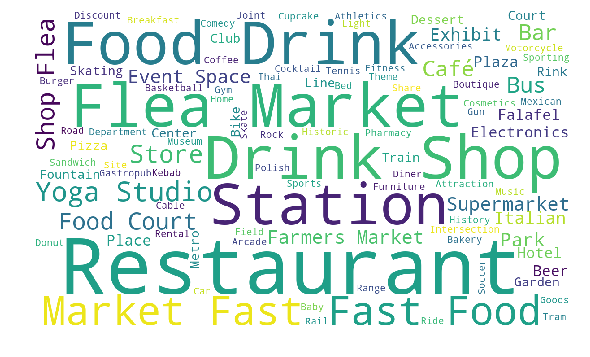

In [288]:
for i, row in cities_merged_warsaw.iterrows():
    comment_words = comment_words + row['1st Most Common Venue'] + ' ' + row['2nd Most Common Venue'] + ' ' + row['3rd Most Common Venue'] + ' ' + row['4th Most Common Venue'] + ' ' + row['5th Most Common Venue'] + ' ' + row['6th Most Common Venue'] + ' ' + row['7th Most Common Venue'] + ' ' + row['8th Most Common Venue'] + ' ' + row['9th Most Common Venue'] + ' ' + row['10th Most Common Venue'] + ' '

wordcloud = WordCloud(width = 1200, height = 720, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

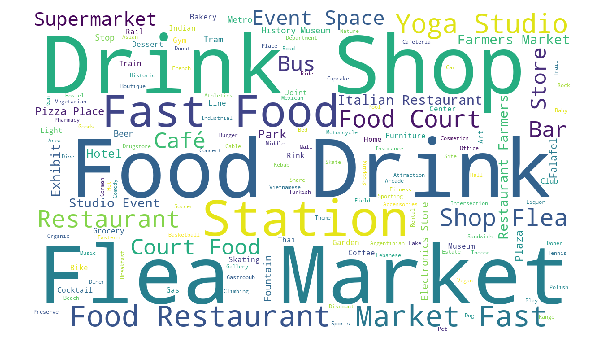

In [289]:
for i, row in cities_merged_berlin.iterrows():
    comment_words = comment_words + row['1st Most Common Venue'] + ' ' + row['2nd Most Common Venue'] + ' ' + row['3rd Most Common Venue'] + ' ' + row['4th Most Common Venue'] + ' ' + row['5th Most Common Venue'] + ' ' + row['6th Most Common Venue'] + ' ' + row['7th Most Common Venue'] + ' ' + row['8th Most Common Venue'] + ' ' + row['9th Most Common Venue'] + ' ' + row['10th Most Common Venue'] + ' '

wordcloud = WordCloud(width = 1200, height = 720, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 8).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# 5. Discussion

Compering Warsaw and Berlin we see a lots of similatrities. There are a large number of Drinks Shoops, Fast Food, Food Drink and Flea Markets. In used data seems that Warsaw has a bigger number of restaurants and Berlin flea markets.


# 6. Conclusion

Based on data which is provided by Foresquare and research made, we can conclude that Warsaw and Berlin are similar cities. Results from this research could give a good insight for people who are interested in these two capital cities. Thanks to this research it is possible for example to conclude which venues are the most common in all districts in Berlin and Warsaw etc. 